### 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### 2. Load Dataset

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')  # Sesuaikan path jika perlu
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 3. Data Understanding

In [ ]:
df.info()
df.describe(include='all')
df['class'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,count
class,
e,4208
p,3916


### 4. Visualisasi Awal

/tmp/ipython-input-8-2144165383.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


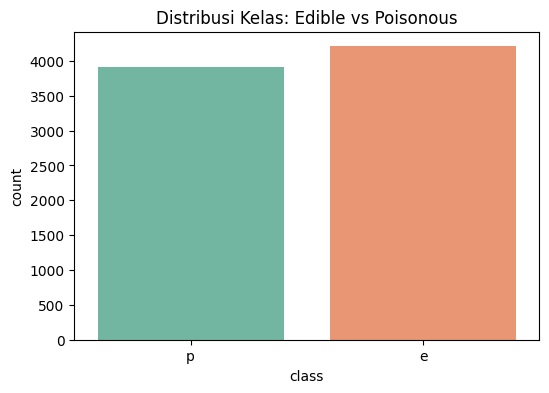

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class', palette='Set2')
plt.title('Distribusi Kelas: Edible vs Poisonous')
plt.show()

### 5. Encoding Label Kategorika

In [ ]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)  # encode semua kolom

df_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### 6. Split Data (Train & Test)

In [ ]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 7. Modelling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#Evaluasi Model
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"=== {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 8. Decision Tree Classifier

=== Decision Tree ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



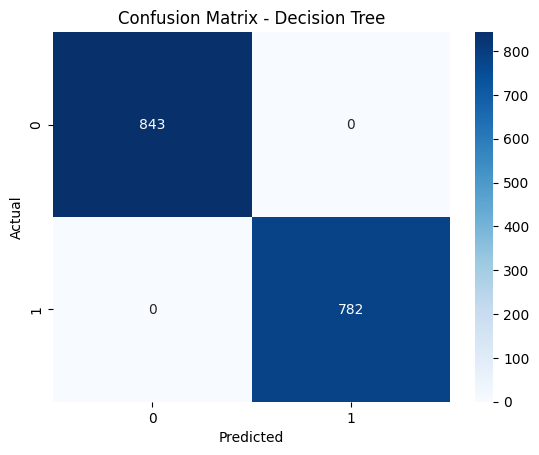

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test, "Decision Tree")


### 9. Random Forest Classifier

=== Random Forest ===
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



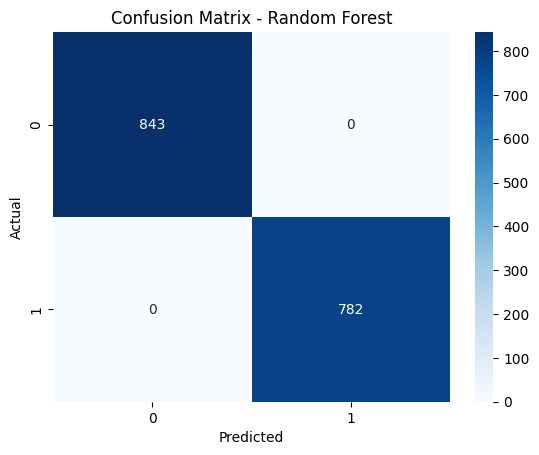

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest")


### 10. Naive Bayes Classifier

=== Naive Bayes ===
Accuracy: 0.9218

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



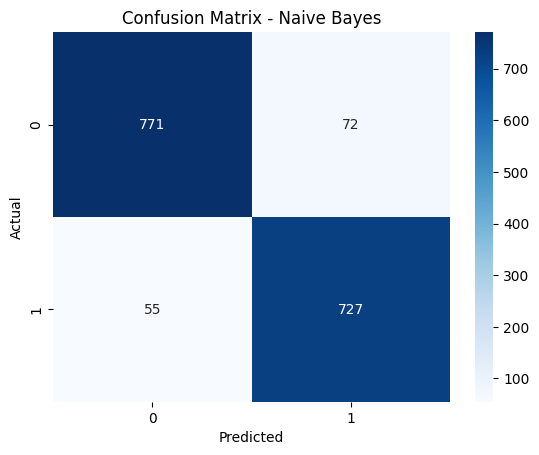

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
evaluate_model(nb_model, X_test, y_test, "Naive Bayes")


### 11. Perbandingan Model dan Menentukan Model Terbaik

=== Perbandingan Performa Model ===
           Model  Accuracy  Precision  Recall  F1-Score
0  Decision Tree    1.0000     1.0000  1.0000    1.0000
1  Random Forest    1.0000     1.0000  1.0000    1.0000
2    Naive Bayes    0.9218     0.9099  0.9297    0.9197


/tmp/ipython-input-15-2571913468.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1-Score", data=eval_df, palette="Set2")


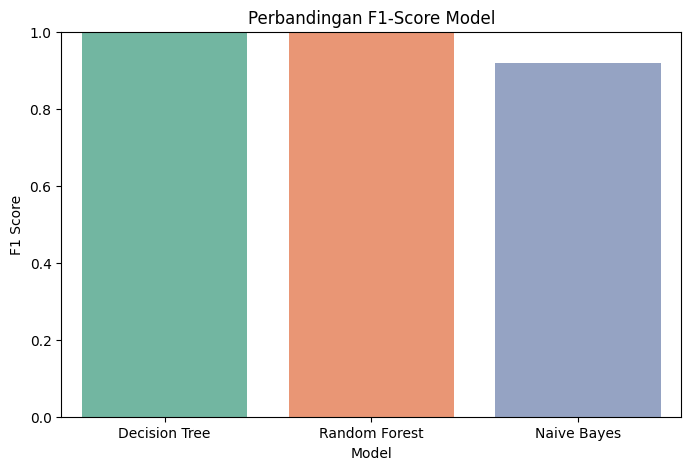


🏆 Model Terbaik Berdasarkan F1-Score: Decision Tree


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Simpan hasil evaluasi setiap model ke dalam list
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model
}

# DataFrame untuk menyimpan hasil evaluasi
eval_results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Loop evaluasi tiap model
for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    eval_results["Model"].append(name)
    eval_results["Accuracy"].append(round(acc, 4))
    eval_results["Precision"].append(round(prec, 4))
    eval_results["Recall"].append(round(rec, 4))
    eval_results["F1-Score"].append(round(f1, 4))

# Buat DataFrame hasil evaluasi
import pandas as pd

eval_df = pd.DataFrame(eval_results)
print("=== Perbandingan Performa Model ===")
print(eval_df)

# Visualisasi perbandingan F1 Score
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="F1-Score", data=eval_df, palette="Set2")
plt.title("Perbandingan F1-Score Model")
plt.ylabel("F1 Score")
plt.ylim(0,1)
plt.show()

# Tentukan model terbaik berdasarkan F1-score tertinggi
best_model_name = eval_df.loc[eval_df['F1-Score'].idxmax(), 'Model']
print(f"\n🏆 Model Terbaik Berdasarkan F1-Score: {best_model_name}")
